# Objective
This notebook demonstrates a more responsive implementation of show_stack()

# Approach
### Faster scrolling
The current version in master creates a new imshow() plot each time the slider is adjusted. Recreating the entire plot is very slow, so instead we use the imshow().set_data() to update just the image data. We should be able to make show_stack(). If we need to go faster, we may need to look into a different plotting library (e.g., pyqtgraph).

### Faster spots
To speed up the spot display, we draw all of the spots on the image (as if they were z projected) before calling interact object. We set all spots to set_visible = False (i.e., make them invisible). Then, when the viewer "scrolls" between slices, toggle the visible property for spots that are members of that frame. We precompute the masks for each slice to speed up the upate function.

### Image query cursor tooltop
Additionally, note that I use the 'notebook' (as opposed to 'inline') matplotlib magic, which both allows the draw to work and as a bonus gives an image tooltip. The tooltip is super useful because it reads out the coordinates and intensity of the pixel under the cursor (exactly what we were talking about today)!


# Questions
* Will the proposed show_spots method generalize to other slicing (i.e., not along z)?
* Is the show_spots responsive enough? We could consider blitting (i.e., only interacting with spots that change state between slices), but it may not be worth the effort.
* What class will be passed to show_spots as the 'results_df'?
* Does it matter what backend (e.g., QtAgg or TkAgg) the user has?

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

from starfish.io import Stack
from starfish.constants import Indices

In [2]:
# Load the MERFISH data set.
MERFISH_json = 'https://dmf0bdeheu4zf.cloudfront.net/MERFISH/fov_001/experiment.json'

s1 = Stack()
s1.read(MERFISH_json)

<IPython.core.display.Javascript object>


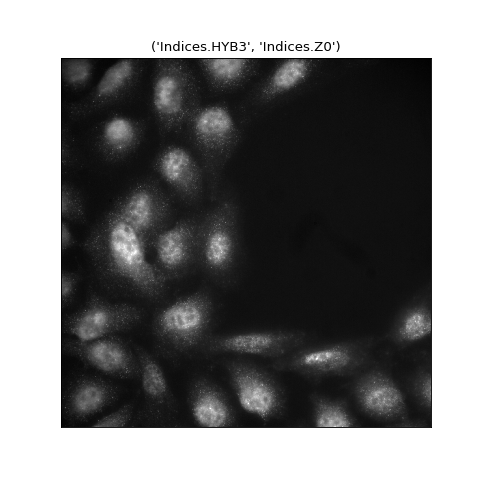

interactive(children=(IntSlider(value=3, description='plane_index', max=7), Output()), _dom_classes=('widget-interact',))

In [3]:
# Show the stack
s1.image.show_stack(indices={Indices.CH: 0}, figure_size=(6, 6));

<IPython.core.display.Javascript object>


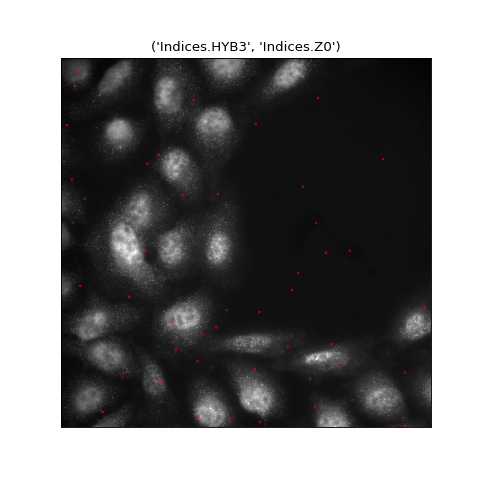

interactive(children=(IntSlider(value=3, description='plane_index', max=7), Output()), _dom_classes=('widget-interact',))

In [4]:
# show_spots. These are fake spots data for now, but this demonstrates the concept. 
# The show_spots tuple is (n_spots, n_spots_on) where n_spots is the total spots throughout the stack 
# and n_spots_on is the number of spots on per slice.
# Adding the circles is slow, so the increasing n_spots increases the amount of time to create 
# the figure, but the scrolling remains responsive. 

s1.image.show_stack(indices={Indices.CH: 0}, figure_size=(6, 6), show_spots=(1000, 50))

<IPython.core.display.Javascript object>


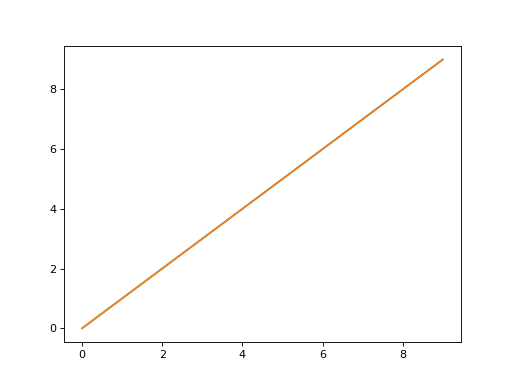

In [5]:
# Test plotting
# Plotting still works, but we need to explicitly assign the plots to a figure/axis
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(range(10));

In [6]:
# Plots don't work when called without a figure (just returns the plot object)
plt.plot(range(10))